<a href="https://colab.research.google.com/github/HeshanNavindu-7/oilspill-detection/blob/main/oilspill_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/saanvitayal07/oil-spill-and-no-oil-spill")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: heshannavindu
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saanvitayal07/oil-spill-and-no-oil-spill


100%|██████████| 26.5M/26.5M [00:00<00:00, 125MB/s] 


In [4]:
import os
import random
import matplotlib.pyplot as plt
import cv2

#define path
dataset_dir="/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix"
class_count={}
for detection_class in os.listdir(dataset_dir):
  print(detection_class)
  class_dir= os.path.join(dataset_dir,detection_class)
  if os.path.isdir(class_dir):
    num_images=len(os.listdir(class_dir))
    class_count[detection_class]=num_images




test
train


Train Data
Displaying 4 samples from 'nospill' class:
Displaying 4 samples from 'oilspill' class:


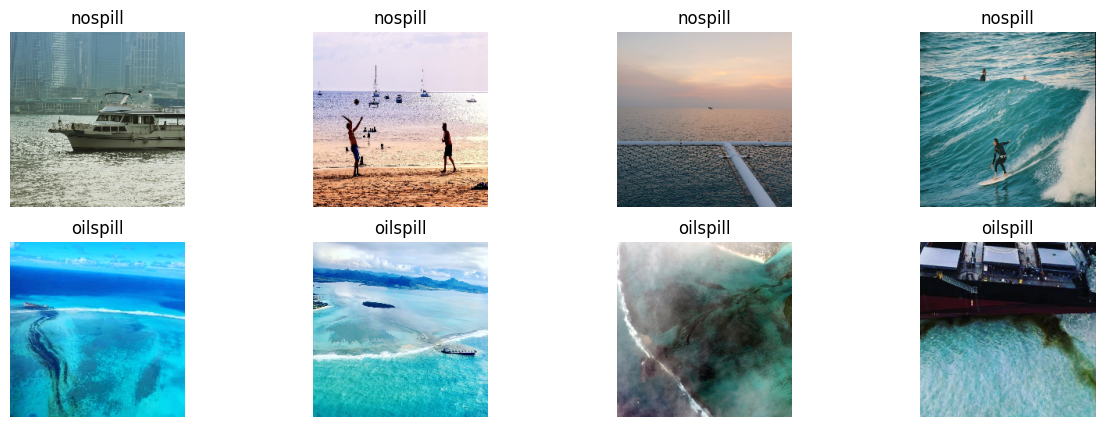

Test Data
Displaying 4 samples from 'nospill' class:
Displaying 4 samples from 'oilspill' class:


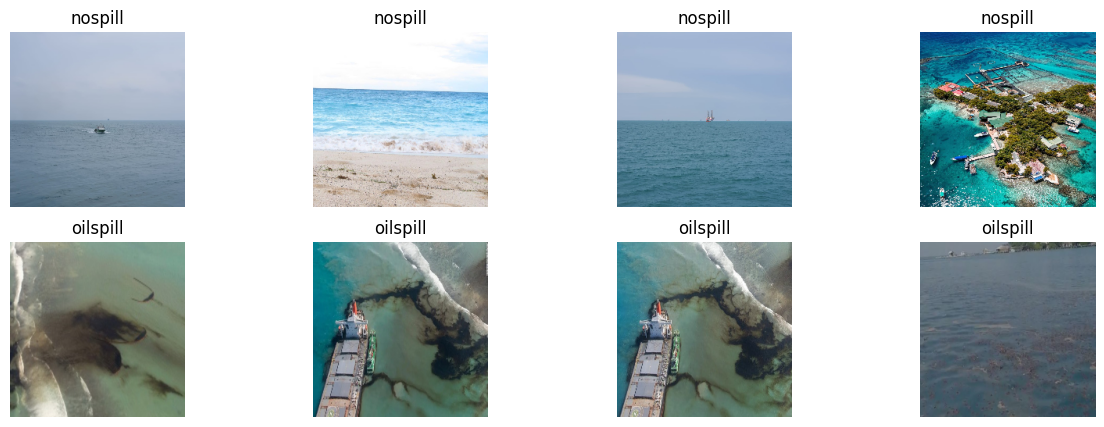

In [5]:
import cv2
import matplotlib.pyplot as plt
import os

# Define subdirectories for train and test data
train_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/train'
test_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/test'

# Define target size for resizing images
target_size = (224, 224)  # Adjust the target size as needed


# Define classes
classes = ['nospill', 'oilspill']

# Display sample data
def display_sample(directory, num_samples=4):
    fig, axs = plt.subplots(len(classes), num_samples, figsize=(15, 5))
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)
        print(f"Displaying {num_samples} samples from '{class_name}' class:")

        for j, filename in enumerate(os.listdir(class_dir)):
            if j >= num_samples:
                break
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, target_size)  # Resize image
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            axs[i, j].set_title(class_name)
    plt.show()

print("Train Data")
display_sample(train_dir)
print("Test Data")
display_sample(test_dir)


In [6]:
# Define directories (adjust these paths to your setup)
train_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/train'
test_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/test'

In [7]:
pip install tensorflow numpy opencv-python imgaug


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import imgaug.augmenters as iaa
import cv2


Found 197 files belonging to 2 classes.


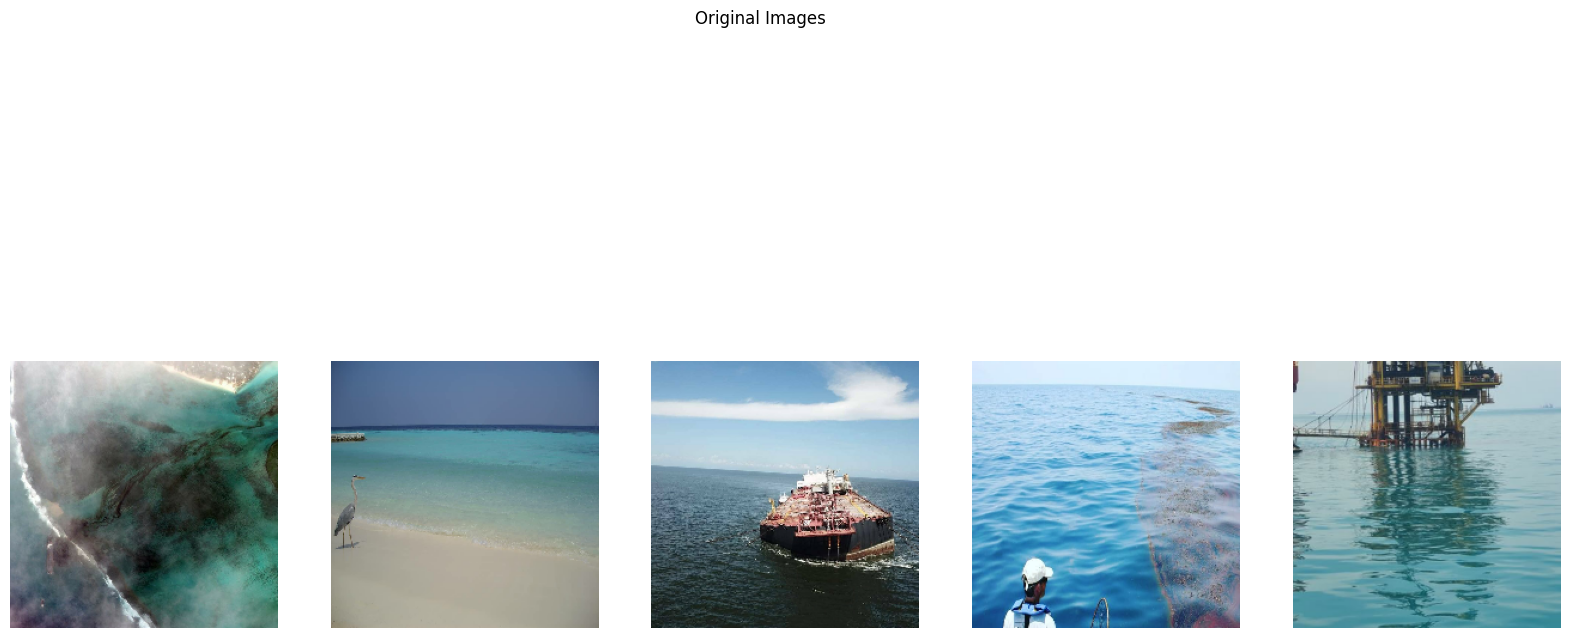

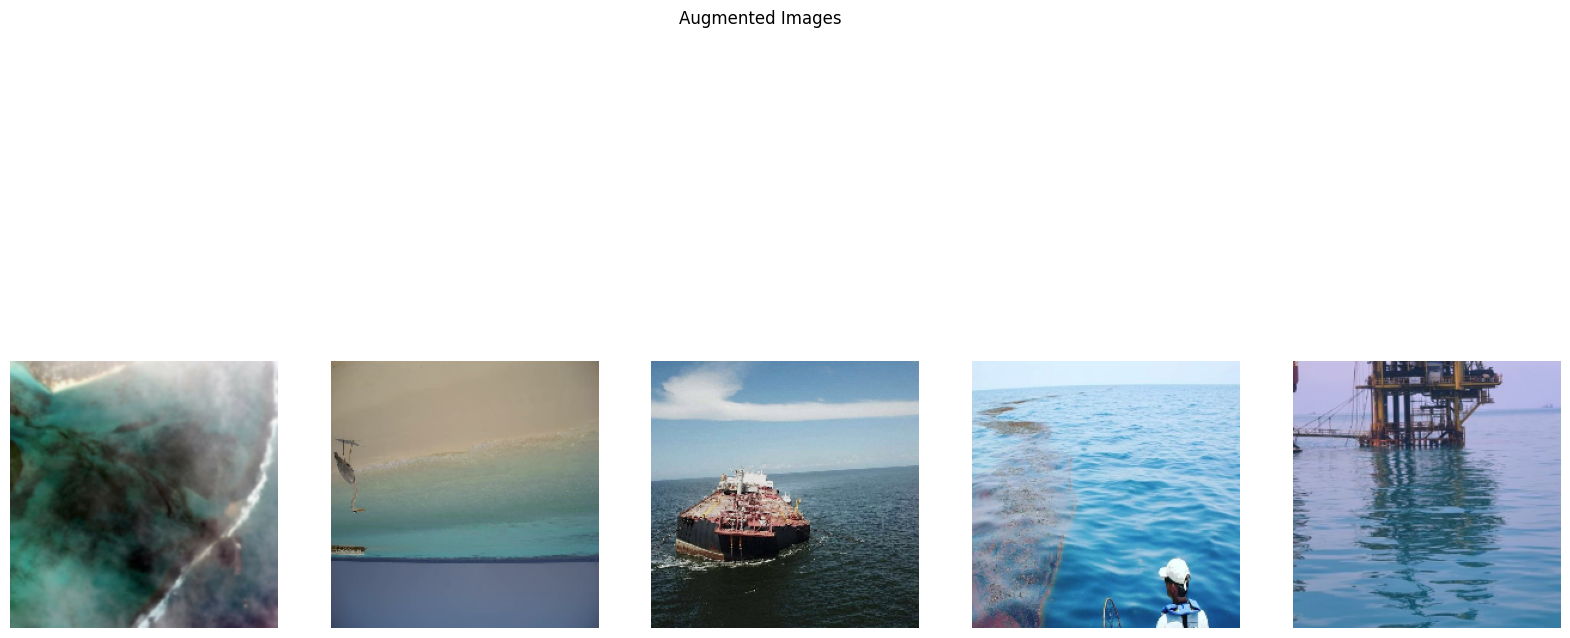

In [17]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa

# Workaround for deprecated np.bool
np.bool = bool

# Define augmentation pipelines
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

seq = iaa.Sequential([
    iaa.SomeOf((1, 3), [
        iaa.GaussianBlur(sigma=(0, 3.0)), # Apply Gaussian blur
        iaa.AdditiveGaussianNoise(scale=(0.0, 0.05*255)), # Inject Gaussian noise
        iaa.Add((-10, 10), per_channel=0.5), # Adjust brightness
        iaa.Multiply((0.8, 1.2), per_channel=0.2), # Adjust brightness and colors
        iaa.Affine(rotate=(-20, 20), scale=(0.8, 1.2)), # Rotate and scale
        iaa.Fliplr(0.5), # Horizontal flip
        iaa.Flipud(0.2)  # Vertical flip
    ], random_order=True)
])

def advanced_augmentation(image):
    image = seq.augment_image(image)
    return image

def display_images(images, title='Images'):
    plt.figure(figsize=(20, 10))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Load and augment images
def load_and_augment_images(directory, batch_size=32, image_size=(224, 224), num_samples=5):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        labels='inferred',
        label_mode='int',
        batch_size=batch_size,
        image_size=image_size,
        shuffle=True
    )

    sample_images = []
    sample_labels = []
    for images, labels in dataset.take(1):
        for i in range(num_samples):
            sample_images.append(images[i].numpy().astype(np.uint8))
            sample_labels.append(labels[i].numpy())

    augmented_images = []
    for image in sample_images:
        aug_image = advanced_augmentation(image)
        augmented_images.append(aug_image)

    return np.array(sample_images), np.array(augmented_images), np.array(sample_labels)

# Adjust the paths to your setup
train_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/train'
test_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/test'

sample_images, augmented_images, _ = load_and_augment_images(train_dir)

# Display original and augmented images
display_images(sample_images, title='Original Images')
display_images(augmented_images, title='Augmented Images')



In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt

# Workaround for deprecated np.bool
np.bool = bool

# Define augmentation pipeline
seq = iaa.Sequential([
    iaa.SomeOf((1, 3), [
        iaa.GaussianBlur(sigma=(0, 3.0)),  # Apply Gaussian blur
        iaa.AdditiveGaussianNoise(scale=(0.0, 0.05*255)),  # Inject Gaussian noise
        iaa.Add((-10, 10), per_channel=0.5),  # Adjust brightness
        iaa.Multiply((0.8, 1.2), per_channel=0.2),  # Adjust brightness and colors
        iaa.Affine(rotate=(-20, 20), scale=(0.8, 1.2)),  # Rotate and scale
        iaa.Fliplr(0.5),  # Horizontal flip
        iaa.Flipud(0.2)  # Vertical flip
    ], random_order=True)
])

def advanced_augmentation(image):
    image = seq.augment_image(image)
    return image

# Load and augment images
def load_and_augment_images(directory, batch_size=32, image_size=(224, 224)):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        labels='inferred',
        label_mode='int',
        batch_size=batch_size,
        image_size=image_size,
        shuffle=True
    )
    return dataset

def augment_images(images, labels):
    augmented_images = []
    for image in images:
        aug_image = advanced_augmentation(image.numpy().astype(np.uint8))
        augmented_images.append(aug_image)
    return np.array(augmented_images), labels

train_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/train'
test_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/test'

train_dataset = load_and_augment_images(train_dir)
test_dataset = load_and_augment_images(test_dir)

# Apply advanced augmentation
train_dataset = train_dataset.map(lambda x, y: tf.numpy_function(augment_images, [x, y], [tf.uint8, tf.int32]))


Found 197 files belonging to 2 classes.
Found 49 files belonging to 2 classes.


In [19]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

def build_model(input_shape=(224, 224, 3), num_classes=2):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    return model

model = build_model()


94765736/94765736 [==============================] - 1s 0us/step


In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt

# Workaround for deprecated np.bool
np.bool = bool

# Define augmentation pipeline
seq = iaa.Sequential([
    iaa.SomeOf((1, 3), [
        iaa.GaussianBlur(sigma=(0, 3.0)),  # Apply Gaussian blur
        iaa.AdditiveGaussianNoise(scale=(0.0, 0.05*255)),  # Inject Gaussian noise
        iaa.Add((-10, 10), per_channel=0.5),  # Adjust brightness
        iaa.Multiply((0.8, 1.2), per_channel=0.2),  # Adjust brightness and colors
        iaa.Affine(rotate=(-20, 20), scale=(0.8, 1.2)),  # Rotate and scale
        iaa.Fliplr(0.5),  # Horizontal flip
        iaa.Flipud(0.2)  # Vertical flip
    ], random_order=True)
])

def advanced_augmentation(image):
    image = seq.augment_image(image)
    return image

def augment_images(images, labels):
    augmented_images = []
    for image in images:
        # Ensure image is in the correct format for imgaug
        aug_image = advanced_augmentation(image.astype(np.uint8))
        augmented_images.append(aug_image)
    return np.array(augmented_images), labels

# Load and augment images
def load_and_augment_images(directory, batch_size=32, image_size=(224, 224)):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        labels='inferred',
        label_mode='int',
        batch_size=batch_size,
        image_size=image_size,
        shuffle=True
    )
    return dataset

train_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/train'
test_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/test'

train_dataset = load_and_augment_images(train_dir)
test_dataset = load_and_augment_images(test_dir)

# Apply advanced augmentation
def augment_images_tf(images, labels):
    augmented_images, new_labels = tf.numpy_function(augment_images, [images, labels], [tf.uint8, tf.int32])
    return augmented_images, new_labels

train_dataset = train_dataset.map(augment_images_tf)

# Debugging: Print dataset shapes
for images, labels in train_dataset.take(1):
    print(images.shape, labels.shape)

# Test the augmentation function with a small batch
for images, labels in train_dataset.take(1):
    augmented_images, _ = augment_images(images.numpy(), labels)
    print(f"Original images shape: {images.shape}")
    print(f"Augmented images shape: {augmented_images.shape}")

# Enable eager execution
tf.config.run_functions_eagerly(True)

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

def build_model(input_shape=(224, 224, 3), num_classes=2):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    return model

model = build_model()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

loss, accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Found 197 files belonging to 2 classes.
Found 49 files belonging to 2 classes.
(32, 224, 224, 3) (32,)
Original images shape: (32, 224, 224, 3)
Augmented images shape: (32, 224, 224, 3)
Epoch 1/10
7/7 [==============================] - 156s 21s/step - loss: 1.5200 - accuracy: 0.6294 - val_loss: 2.0944 - val_accuracy: 0.7143
Epoch 2/10
7/7 [==============================] - 147s 21s/step - loss: 0.8892 - accuracy: 0.7716 - val_loss: 0.8485 - val_accuracy: 0.7755
Epoch 3/10
7/7 [==============================] - 159s 22s/step - loss: 0.3056 - accuracy: 0.8832 - val_loss: 0.5036 - val_accuracy: 0.8571
Epoch 4/10
7/7 [==============================] - 147s 20s/step - loss: 0.2245 - accuracy: 0.9289 - val_loss: 0.3441 - val_accuracy: 0.8571
Epoch 5/10
7/7 [==============================] - 151s 21s/step - loss: 0.1300 - accuracy: 0.9594 - val_loss: 0.3360 - val_accuracy: 0.8776
Epoch 6/10
7/7 [==============================] - 148s 21s/step - loss: 0.1066 - accuracy: 0.9492 - val_loss: 0.27

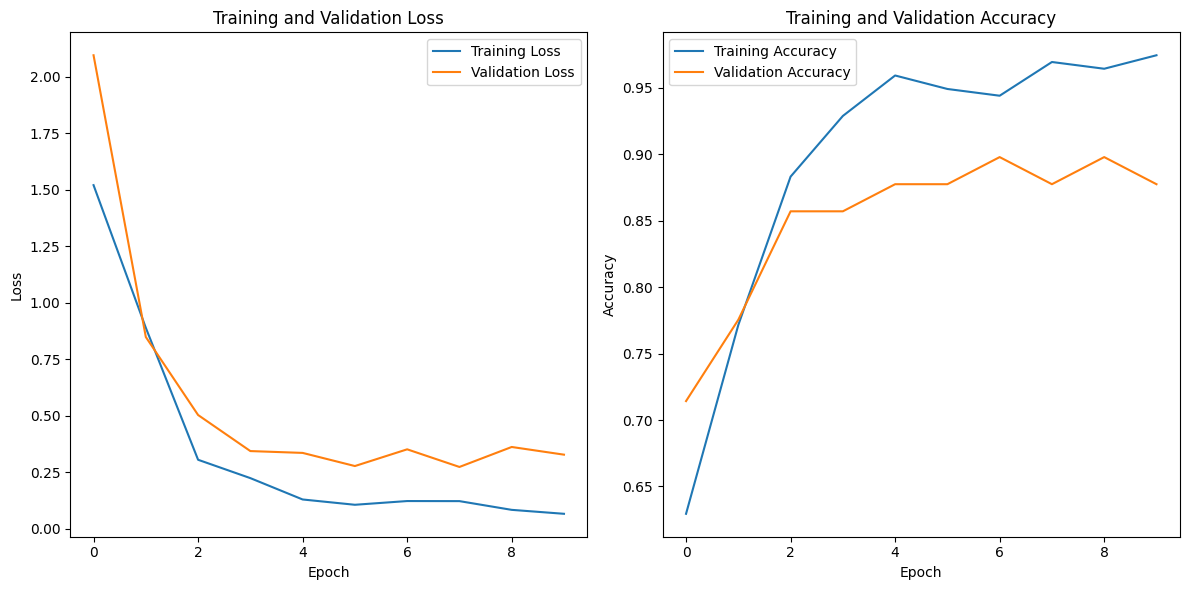

In [32]:
import matplotlib.pyplot as plt

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [33]:
# Assuming you have trained your model and have access to the history object
# The history object contains training and validation metrics for each epoch

# Get the validation accuracy
validation_accuracy = history.history['val_accuracy']

# Print the last validation accuracy recorded during training
print("Validation Accuracy:", validation_accuracy[-1])
# Assuming you have trained your model and have access to the history object
# The history object contains training and validation metrics for each epoch

# Get the validation loss
validation_loss = history.history['val_loss']

# Print the last validation loss recorded during training
print("Validation Loss:", validation_loss[-1])


Validation Accuracy: 0.8775510191917419
Validation Loss: 0.3282034695148468


1/1 [==============================] - 0s 365ms/step
The image is predicted to be an oil spill image with 95.50% confidence.


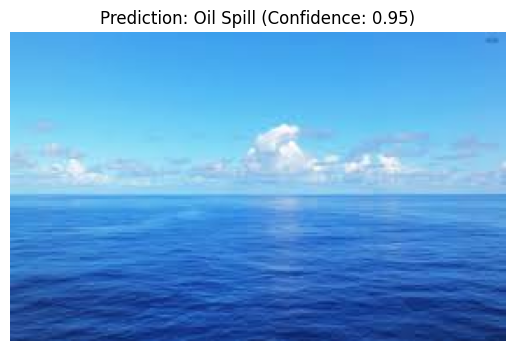

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('oil_spill_detection_xception.h5')

# Function to preprocess and load an image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

# Function to make prediction
def predict_image(model, img_path):
    img = load_and_preprocess_image(img_path)
    prediction = model.predict(img)
    return prediction[0][0], prediction

# Path to the image to be checked
img_path = '/content/download (3).jfif'

# Make a prediction
prediction_prob, prediction = predict_image(model, img_path)

# Print the result and accuracy
if prediction_prob >= 0.5:
    print("The image is predicted to be an oil spill image with {:.2f}% confidence.".format(prediction_prob * 100))
else:
    print("The image is predicted to be a no spill image with {:.2f}% confidence.".format((1 - prediction_prob) * 100))

# Optional: Display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Prediction: {"Oil Spill" if prediction_prob >= 0.5 else "No Spill"} (Confidence: {prediction_prob:.2f})')
plt.axis('off')
plt.show()


1/1 [==============================] - 1s 559ms/step
Image '/content/download (3).jfif' is predicted to be an oil spill image with confidence: 0.95


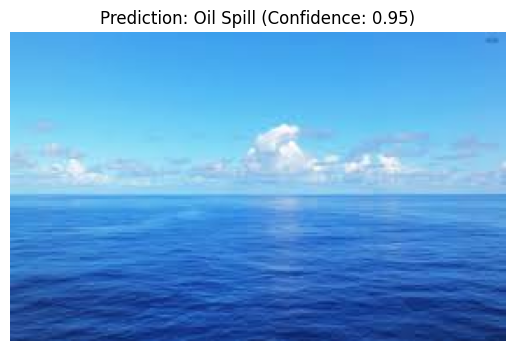

1/1 [==============================] - 0s 384ms/step
Image '/content/images (1).jfif' is predicted to be an oil spill image with confidence: 0.96


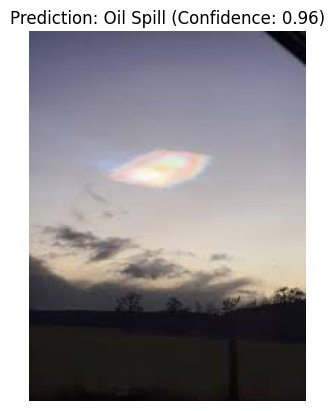

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('oil_spill_detection_xception.h5')

# Function to preprocess and load an image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

# Function to make prediction
def predict_image(model, img_path):
    img = load_and_preprocess_image(img_path)
    prediction = model.predict(img)
    return prediction[0][0], prediction

# Paths to images to be checked
img_paths = ['/content/download (3).jfif', '/content/images (1).jfif']

# Make predictions and print results
for img_path in img_paths:
    prediction_prob, prediction = predict_image(model, img_path)
    if prediction_prob >= 0.5:
        print(f"Image '{img_path}' is predicted to be an oil spill image with confidence: {prediction_prob:.2f}")
    else:
        print(f"Image '{img_path}' is predicted to be a no spill image with confidence: {1 - prediction_prob:.2f}")

    # Optional: Display the image with prediction
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Prediction: {"Oil Spill" if prediction_prob >= 0.5 else "No Spill"} (Confidence: {prediction_prob:.2f})')
    plt.axis('off')
    plt.show()
